In [ ]:
# Set random seeds for reproducibility
import os
import random
import numpy as np
import tensorflow as tf
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Enforce TensorFlow deterministic operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [ ]:
# Import python libraries


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
import seaborn as sns
import re
import tensorflow as tf
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras

from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import nltk
import random
from sklearn.metrics import accuracy_score


# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
from google.colab import files
import pandas as pd
import io

# رفع الملف من جهاز الكمبيوتر
uploaded = files.upload()
# الحصول على اسم الملف المرفوع بشكل ديناميكي
cyberbullying_datasets_new = next(iter(uploaded))
# قراءة ملف Excel باستخدام pandas و io.BytesIO
df = pd.read_excel(io.BytesIO(uploaded[cyberbullying_datasets_new]))

# عرض أول 5 صفوف من البيانات
df.head()


Saving cyberbullying datasets new.xlsx to cyberbullying datasets new.xlsx


,Comments,Type
0,ههههههههههه شنو يضحكون أستغفر لله,
1,انت الحمار والكلب وانت مريض نفسي وانت لو رجال...,Bullying
2,انا احب حلا الترك الي يطلع منها حلوووو عفيه عل...,NaN
3,شدكول على اختي يا حلا جمال,NaN
4,اولا هادي مشاكل عايلية والحمار لي ينزل فيديو م...,Bullying


In [ ]:
data=pd.read_excel('cyberbullying datasets new.xlsx')
data
set(data.Type)

{' ', '  ', ' Bullying', ' Bullying ', 'Bullying', 'bullying', nan}

In [ ]:
# Define mapping for classes
class_mapping = {
    'Normal': 'Normal',
    ' Bullying': 'Bullying',
    ' Bullying ': 'Bullying',
    'Bullying': 'Bullying',
    'bullying' : 'Bullying',
    ' ': 'Bullying',
    '  ': 'Bullying',
    np.nan: 'Normal'
}

# Apply mapping to the 'target' column
data['Type'] = data['Type'].map(class_mapping)



print(data)


                                                Comments      Type
0                     ههههههههههه شنو يضحكون أستغفر  لله  Bullying
1      انت  الحمار والكلب وانت مريض نفسي وانت لو رجال...  Bullying
2      انا احب حلا الترك الي يطلع منها حلوووو عفيه عل...    Normal
3                             شدكول على اختي يا حلا جمال    Normal
4      اولا هادي مشاكل عايلية والحمار لي ينزل فيديو م...  Bullying
...                                                  ...       ...
30395                                   حماره مافي متلها  Bullying
30396                                    زوجك مجنون متلك  Bullying
30397                                تاكل خرا مي العيدان  Bullying
30398                     احلام انت معفنه و زبالة الخليج  Bullying
30399                                   زق على حلا الترك  Bullying

[30400 rows x 2 columns]


In [ ]:
# check null value
data.isna().sum()

,0
Comments,0
Type,0


In [ ]:
missing_values = data[data.isna().any(axis=1)]
print(missing_values)


Empty DataFrame
Columns: [Comments, Type]
Index: []


In [ ]:
data_cleaned = data.dropna()


In [ ]:
# ملء القيم المفقودة بقيمة محددة (مثلاً القيم الأكثر تكراراً)
data['Type'].fillna(data['Type'].mode()[0], inplace=True)


In [ ]:
set(data.Type)
# so we have many

{'Bullying', 'Normal'}

In [ ]:
import re

def clean_arabic_text(text):
    """Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    and remove words containing numbers."""
    if isinstance(text, str):
        text = text.lower()
        text = re.sub("-", " ", text)
        text = re.sub('"', " ", text)
        text = re.sub("\[.*?\]", "", text)
        text = re.sub("https?://\S+|www\.\S+", "", text)
        text = re.sub("<.*?>+", "", text)
        text = re.sub("\n", "", text)
        # Remove English letters and numbers
        text = re.sub("[a-zA-Z0-9]", "", text)
        text = " ".join(filter(lambda x: x[0] != "@", text.split()))
    return text

# Example usage:
data.Comments = data.Comments.apply(clean_arabic_text)
data

,Comments,Type
0,ههههههههههه شنو يضحكون أستغفر لله,Bullying
1,انت الحمار والكلب وانت مريض نفسي وانت لو رجال ...,Bullying
2,انا احب حلا الترك الي يطلع منها حلوووو عفيه عل...,Normal
3,شدكول على اختي يا حلا جمال,Normal
4,اولا هادي مشاكل عايلية والحمار لي ينزل فيديو م...,Bullying
...,...,...
30395,حماره مافي متلها,Bullying
30396,زوجك مجنون متلك,Bullying
30397,تاكل خرا مي العيدان,Bullying
30398,احلام انت معفنه و زبالة الخليج,Bullying


<ipython-input-14-07cc29ca8749>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values , palette=['dodgerblue', 'orange'])


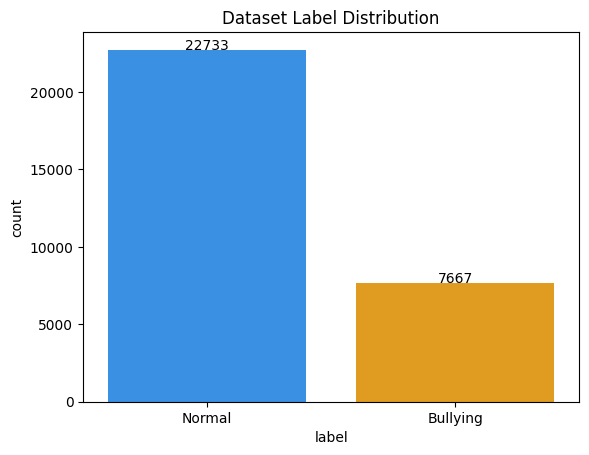

In [ ]:
# Consolidate all bullying labels
k = data['Type']


# Count the occurrences of each label
label_counts = k.value_counts()

# Plot the bar chart
sns.barplot(x=label_counts.index, y=label_counts.values , palette=['dodgerblue', 'orange'])
plt.title('Dataset Label Distribution')
plt.xlabel('label')
plt.ylabel('count')
for i, value in enumerate(label_counts.values):
    plt.text(i, value + 1, str(value), ha='center')
plt.show()

In [ ]:
# Split the inputs and targets of the trian and test datasets

text =data.Comments
target=data.Type

train_text, test_text, train_target, test_target = model_selection.train_test_split(text, target, test_size=0.2,
                                                                                    random_state=42)


In [ ]:
# Ensure all elements in train_text are strings
texts = [str(text) for text in train_text]

# Then proceed with your code
unique = set()
for text in texts:
    for word in text.split():
        unique.add(word)

num_unique_words = len(unique)
print(num_unique_words)

34706


# **Analyzing Text Statistics**
We can now do some statistical analysis to explore the fundamental characteristics of the text data. Some of the analyses which can be helpful are:

Text length analysis: calculating the length of the text, or the number of charachter per sentance
word frequency analysis: calculating the word count in the form of unigrams, bigrams and trigrams

In [ ]:
text_length = data['Comments'].astype(str).apply(len)
text_word_count = data['Comments'].apply(lambda x: len(str(x).split()))
np.max(text_word_count)

192

<ipython-input-18-7919d12243ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_length)


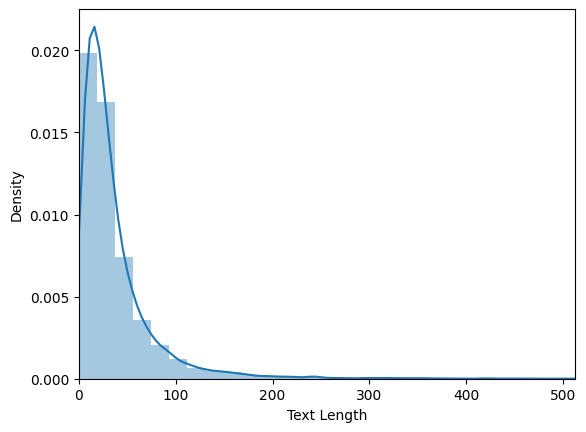

In [ ]:
sns.distplot(text_length)
plt.xlim([0, 512]);
plt.xlabel('Text Length');

### Text Preprocessing

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words("arabic"))
stemmer = nltk.stem.snowball.SnowballStemmer("arabic")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Tokenizing and padding the text
Note: use a vocabulary size of 20,000 and maximum sequence length of 66

In [ ]:
# Below are some parameters that we'll set up now

vocab_size = 20000
max_sequence = 66
embeddings_dims = 32

num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

In [ ]:
# Ensure all elements in train_text are strings
train_text = [str(text) for text in train_text]
test_text = [str(text) for text in test_text]

# Tokenize the train and test texts
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=vocab_size,  # Maximum number of tokens to include
    oov_token="<OOV>",     # A token that will replace words not in the vocabulary set by vocab_size
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'  # Symbols that will be removed from the texts
)

tokenizer.fit_on_texts(train_text)
print(tokenizer.word_index)

train_text_tokenized = tokenizer.texts_to_sequences(train_text)
test_text_tokenized = tokenizer.texts_to_sequences(test_text)

{'<OOV>': 1, 'الله': 2, 'من': 3, 'في': 4, 'يا': 5, 'الي': 6, 'ما': 7, 'والله': 8, 'و': 9, 'على': 10, 'انت': 11, 'لايك': 12, 'لا': 13, 'انا': 14, 'بس': 15, 'كل': 16, 'ابو': 17, 'قحطن': 18, 'ولا': 19, 'مو': 20, 'البيك': 21, 'شي': 22, 'هذا': 23, 'اللي': 24, 'عليك': 25, 'زق': 26, 'لو': 27, 'عشان': 28, 'امك': 29, 'وش': 30, 'ان': 31, 'ممكن': 32, 'بيتزا': 33, 'حرام': 34, 'ليش': 35, 'محمد': 36, 'ي': 37, 'نيفو': 38, 'ذا': 39, 'المقطع': 40, 'عن': 41, 'كذاب': 42, 'واحد': 43, 'ام': 44, 'كذب': 45, 'انك': 46, 'تايقر': 47, 'هو': 48, 'ع': 49, 'او': 50, 'مع': 51, 'يعني': 52, 'معي': 53, 'اذا': 54, 'هي': 55, 'لك': 56, 'اول': 57, 'فلوس': 58, 'كيف': 59, 'بالله': 60, 'فيه': 61, 'انه': 62, 'كنتاكي': 63, 'كان': 64, 'خرا': 65, '؟': 66, 'ناس': 67, 'ترا': 68, 'الا': 69, 'ايش': 70, 'ياخي': 71, 'شو': 72, 'كلب': 73, 'الناس': 74, 'وين': 75, 'عليكم': 76, 'ب': 77, 'فيها': 78, 'بعد': 79, 'كس': 80, 'يوم': 81, 'اكل': 82, 'شنو': 83, 'اي': 84, 'بيك': 85, 'هذي': 86, 'اني': 87, 'انتي': 88, 'قال': 89, 'وانت': 90, 'هاي': 91, '

In [ ]:
print(train_text[0])
print(train_text_tokenized[0])
print(test_text[101])
print(test_text_tokenized[101])

ما بديت المقطع والله ابو قحطن
[7, 6146, 40, 8, 17, 18]
ماشاء الله لاقوة الا بالله مبدعين وإلي الأمام
[210, 2, 1, 69, 60, 254, 1, 2336]


In [ ]:
# Pad the train and test texts


print("Length of Review 1:", len(train_text_tokenized[0]))
print("Length of Review 10:", len(train_text_tokenized[9]))
print("Length of Review 1000:", len(train_text_tokenized[999]))

train_padded = tf.keras.preprocessing.sequence.pad_sequences(
    train_text_tokenized,  # The sequences that will be padded/clipped
    maxlen=max_sequence,  # The maximum length of the sequence using max_sequence that's defined earlier
    padding="post",  # Where we'll add zeros if sequence length is shorter that the maximum length, this will add zeros to the end of the sentence
)

test_padded = tf.keras.preprocessing.sequence.pad_sequences(
    test_text_tokenized,  # The sequences that will be padded/clipped
    maxlen=max_sequence,  # The maximum length of the sequence using max_sequence that's defined earlier
    padding="post",  # Where we'll add zeros if sequence length is shorter that the maximum length, this will add zeros to the end of the sentence
)
# Let's print out the length of some padded sequences
print("Length of Review 1:", len(train_padded[0]))
print("Length of Review 10:", len(train_padded[9]))
print("Length of Review 1000:", len(train_padded[999]))

Length of Review 1: 6
Length of Review 10: 3
Length of Review 1000: 3
Length of Review 1: 66
Length of Review 10: 66
Length of Review 1000: 66


### **Preprocess the targets to prepare them for the training**

In [ ]:
set(train_target)

{'Bullying', 'Normal'}

In [ ]:
# Create the data dictionary
train_target.replace({'Bullying':0, 'Normal':1}, inplace=True)
test_target.replace({'Bullying':0, 'Normal':1}, inplace=True)
set(train_target)

{0, 1}

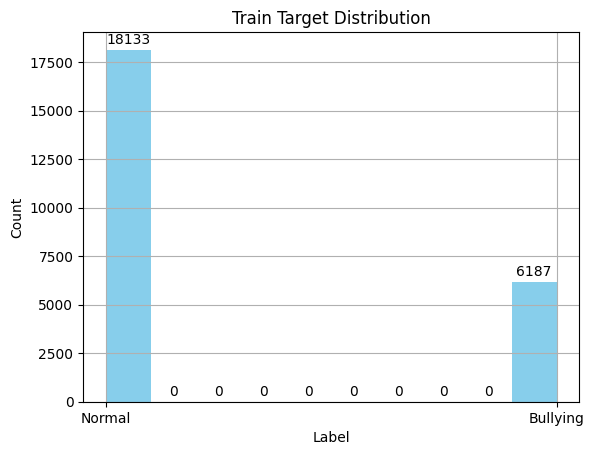

In [ ]:
# Plot the histogram for test_target
text =data.Comments
target=data.Type

train_text, test_text, train_target, test_target = model_selection.train_test_split(text, target, test_size=0.2,
                                                                                    random_state=42)

ax = train_target.hist(color='skyblue')

plt.title('Train Target Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Add text annotations to the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')


plt.show()

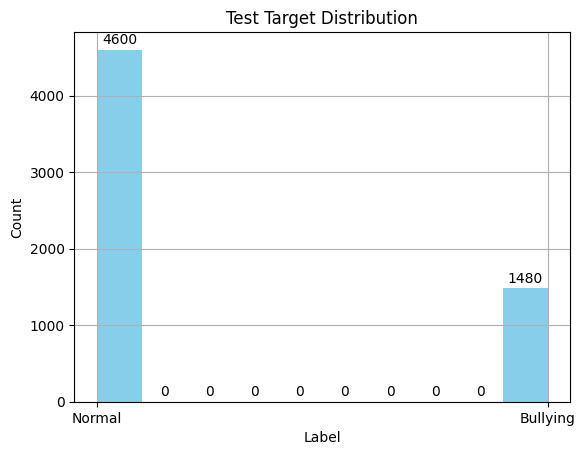

In [ ]:
# Plot the histogram for test_target
text =data.Comments
target=data.Type

train_text, test_text, train_target, test_target = model_selection.train_test_split(text, target, test_size=0.2,
                                                                                    random_state=42)

ax = test_target.hist(color='skyblue')

plt.title('Test Target Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Add text annotations to the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

In [ ]:
# Create TF data pipeline

def dataset_creator(x, y):
    data = tf.data.Dataset.from_tensor_slices((x, y))
    data = data.shuffle(16000 ,seed = 10)
    data = data.batch(1024)
    data = data.prefetch(tf.data.experimental.AUTOTUNE)
    return data


train_dataset = dataset_creator(train_padded, train_target)
test_dataset = dataset_creator(test_padded, test_target)


result=pd.DataFrame(columns=['Models','Accuracy'])

### Modeling:
### Define the sequential models, we used RNN, LSTM, GRU and DNN with Embedding layers using Bidirectional RNN along with applying Attention Mechanism.

### **Models RNN**

In [ ]:
# Create the model

model_rnn = keras.Sequential(
    [
        keras.layers.Input([max_sequence]),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence)

       keras.layers.Embedding(vocab_size + 1, embeddings_dims,input_length=max_sequence ,mask_zero=True),

    # tf.keras.layers.Lambda(lambda x: tf.reshape(x, (-1, 64, 1))),


        keras.layers.SimpleRNN(units=32,return_sequences=True),
        keras.layers.SimpleRNN(units=64),
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# Display the model summary

model_rnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 66, 32)              │         640,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 66, 32)              │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,385 (2.47 MB)

 Trainable params: 648,385 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Evaluation RNN**

In [ ]:
# Evaluate the model

# code start here
model_rnn.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

EPOCHS = 50
checkpoint_filepath = 'RNN.keras'
checkpointer = ModelCheckpoint(checkpoint_filepath,verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 3)

history=model_rnn.fit(train_dataset , validation_data=test_dataset,epochs=EPOCHS,
                      callbacks=[checkpointer , early_stopping])

print('*'*50)
model_rnn=load_model(checkpoint_filepath)

result.loc[len(result.index)] = ['RNN', model_rnn.evaluate(test_dataset,verbose=2)[1]]

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6840 - loss: 0.6087
Epoch 1: val_loss improved from inf to 0.41044, saving model to RNN.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 569ms/step - accuracy: 0.6875 - loss: 0.6052 - val_accuracy: 0.8727 - val_loss: 0.4104
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.9101 - loss: 0.2829
Epoch 2: val_loss improved from 0.41044 to 0.34574, saving model to RNN.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 360ms/step - accuracy: 0.9108 - loss: 0.2813 - val_accuracy: 0.9268 - val_loss: 0.3457
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9705 - loss: 0.1471
Epoch 3: val_loss improved from 0.34574 to 0.28233, saving model to RNN.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.9706 - loss: 0.1466 - val_accuracy: 0.9396 - val_loss: 0.2823
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.9836 - loss: 0.0929
Epoch 4: val_loss improved from 0.28233 to 0.20670, saving model to RNN.k

<Figure size 1000x600 with 0 Axes>

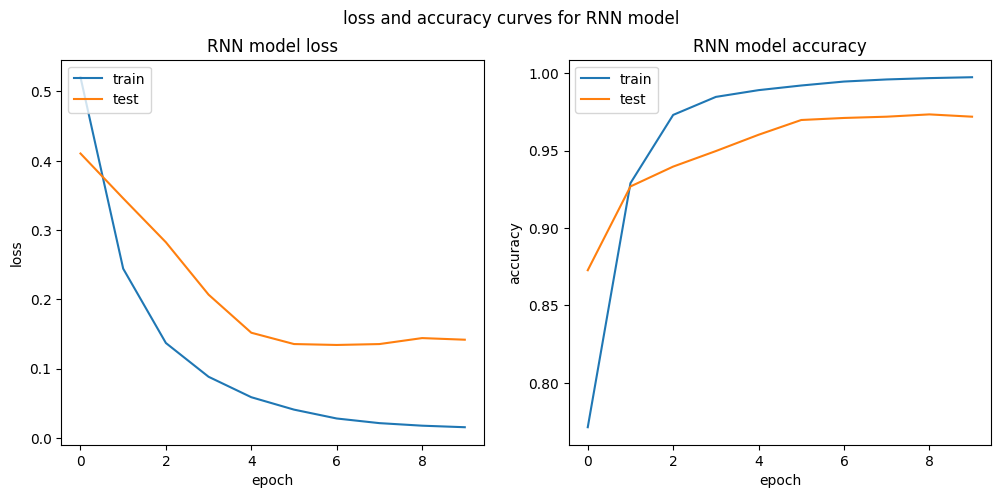

In [ ]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('loss and accuracy curves for RNN model')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('RNN model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')


ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('RNN model accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
fig.show()

### **Model LSTM**

In [ ]:
# Create the model

model_lstm=keras.Sequential([
                keras.layers.Input(shape=[max_sequence]),
                keras.layers.Embedding(input_dim=vocab_size+1,output_dim=embeddings_dims,mask_zero=True),
                keras.layers.LSTM(units=64),

                keras.layers.Dense(units=1,activation="sigmoid"),

])
# Display the model summary

model_lstm.summary(
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 66, 32)              │         640,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 664,929 (2.54 MB)

 Trainable params: 664,929 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Evaluation LSTM**

In [ ]:
# Evaluate the model

model_lstm.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

EPOCHS = 50

checkpoint_filepath = 'LSTM.keras'
checkpointer = ModelCheckpoint(checkpoint_filepath,verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 3)

history=model_lstm.fit(train_dataset , validation_data=test_dataset,epochs=EPOCHS, callbacks=[checkpointer , early_stopping])

print('*'*50)
model_lstm=load_model(checkpoint_filepath)

result.loc[len(result.index)] = ['LSTM', model_lstm.evaluate(test_dataset,verbose=2)[1]]

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7238 - loss: 0.6523
Epoch 1: val_loss improved from inf to 0.50630, saving model to LSTM.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 552ms/step - accuracy: 0.7250 - loss: 0.6503 - val_accuracy: 0.8002 - val_loss: 0.5063
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.8275 - loss: 0.4665
Epoch 2: val_loss improved from 0.50630 to 0.46301, saving model to LSTM.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 529ms/step - accuracy: 0.8287 - loss: 0.4648 - val_accuracy: 0.8920 - val_loss: 0.4630
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9284 - loss: 0.3037
Epoch 3: val_loss improved from 0.46301 to 0.35456, saving model to LSTM.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 527ms/step - accuracy: 0.9288 - loss: 0.3029 - val_accuracy: 0.9186 - val_loss: 0.3546
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.9562 - loss: 0.2159
Epoch 4: val_loss improved from 0.35456 to 0.29567, saving model to L

<Figure size 1000x600 with 0 Axes>

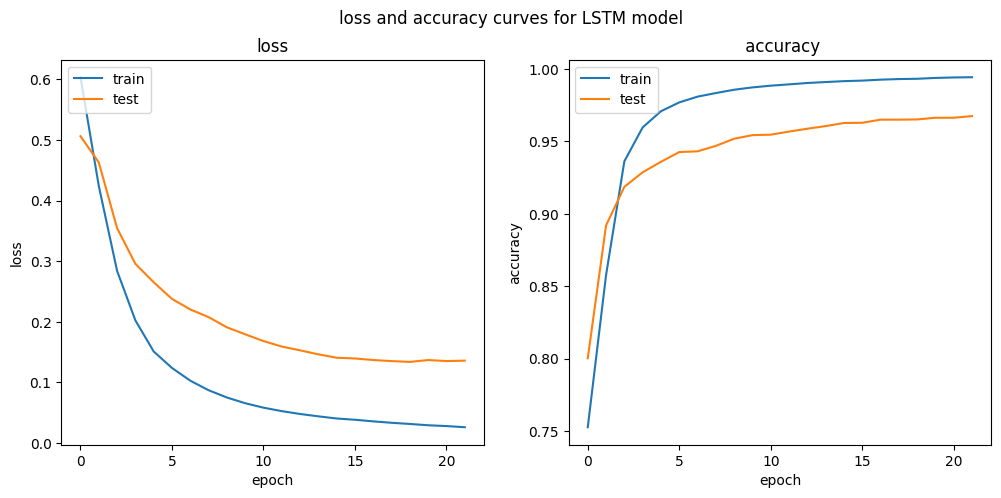

In [ ]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('loss and accuracy curves for LSTM model')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')


ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title(' accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
fig.show()

### **Model GRU**

In [ ]:
# Create the model

model_GRU=keras.Sequential([
                    keras.layers.Input(shape=[max_sequence]),
                    keras.layers.Embedding(input_dim=vocab_size+1,output_dim=embeddings_dims,mask_zero=True),
                    keras.layers.GRU(units=64),
                    keras.layers.Dense(units=1,activation="sigmoid")
])
# Display the model summary

model_GRU.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 66, 32)              │         640,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 658,913 (2.51 MB)

 Trainable params: 658,913 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Evaluation GRU**

In [ ]:
# Evaluate the model

model_GRU.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

EPOCHS = 50
checkpoint_filepath = 'GRU.keras'

checkpointer = ModelCheckpoint(checkpoint_filepath,verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 3)

history=model_GRU.fit(train_dataset , validation_data=test_dataset,epochs=EPOCHS, callbacks=[checkpointer , early_stopping])


print('*'*50)
model_GRU=load_model(checkpoint_filepath)
result.loc[len(result.index)] = ['GRU', model_GRU.evaluate(test_dataset,verbose=2)[1]]

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.7019 - loss: 0.6466
Epoch 1: val_loss improved from inf to 0.51259, saving model to GRU.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step - accuracy: 0.7032 - loss: 0.6445 - val_accuracy: 0.7716 - val_loss: 0.5126
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.7966 - loss: 0.4460
Epoch 2: val_loss improved from 0.51259 to 0.45665, saving model to GRU.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 522ms/step - accuracy: 0.7978 - loss: 0.4448 - val_accuracy: 0.8780 - val_loss: 0.4567
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.9254 - loss: 0.2970
Epoch 3: val_loss improved from 0.45665 to 0.35106, saving model to GRU.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 527ms/step - accuracy: 0.9258 - loss: 0.2955 - val_accuracy: 0.9257 - val_loss: 0.3511
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.9634 - loss: 0.1751
Epoch 4: val_loss improved from 0.35106 to 0.27540, saving model to GRU.

<Figure size 1000x600 with 0 Axes>

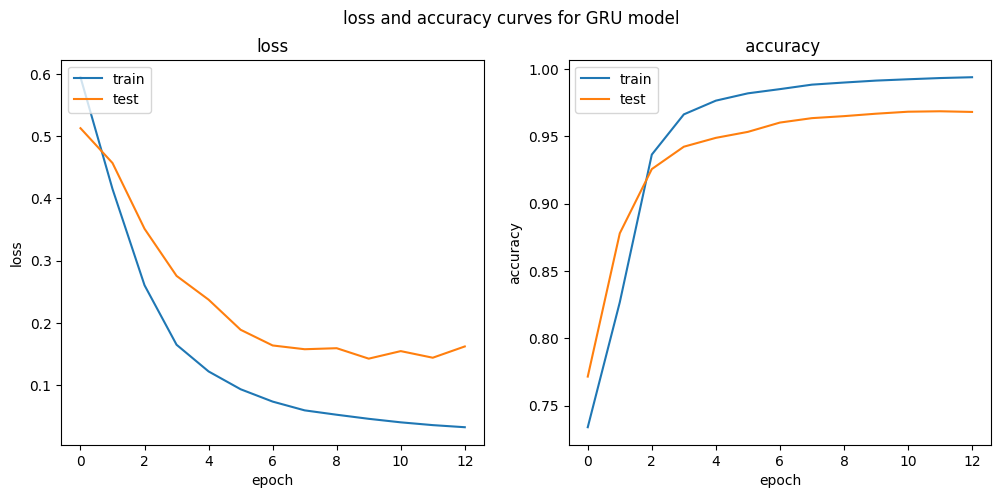

In [ ]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('loss and accuracy curves for GRU model')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')


ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title(' accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
fig.show()

### **Model Bidirectional RNN**

In [ ]:
# Create the model

model_Bi_rnn = keras.Sequential(
    [
        keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence). Alternatively, this can be defined as a part of the Embedding layer
        # mask_zero is set to True to ignore the zero padding
      keras.layers.Embedding(input_dim=vocab_size+1,output_dim=embeddings_dims,mask_zero=True),
  # Embedding layer with input dim of vocab_size + 1 (to account for paddings)
        keras.layers.Bidirectional(keras.layers.SimpleRNN(32, return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.SimpleRNN(64, return_sequences=False)),
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# Display the model summary
model_Bi_rnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 66, 32)              │         640,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 66, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 660,833 (2.52 MB)

 Trainable params: 660,833 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Evaluation Bidirectional RNN**

In [ ]:
# Evaluate the model

model_Bi_rnn.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

EPOCHS = 50
checkpoint_filepath = 'bi_RNN.keras'

checkpointer = ModelCheckpoint(checkpoint_filepath,verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 3)

history= model_Bi_rnn.fit(train_dataset , validation_data=test_dataset,epochs=EPOCHS, callbacks=[checkpointer , early_stopping])
print('*'*50)
model_Bi_rnn=load_model(checkpoint_filepath)
result.loc[len(result.index)] = ['Bi_RNN', model_Bi_rnn.evaluate(test_dataset,verbose=2)[1]]

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.7140 - loss: 0.5809
Epoch 1: val_loss improved from inf to 0.41614, saving model to bi_RNN.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 716ms/step - accuracy: 0.7171 - loss: 0.5770 - val_accuracy: 0.8964 - val_loss: 0.4161
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.9396 - loss: 0.2303
Epoch 2: val_loss improved from 0.41614 to 0.32992, saving model to bi_RNN.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 656ms/step - accuracy: 0.9400 - loss: 0.2291 - val_accuracy: 0.9321 - val_loss: 0.3299
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.9803 - loss: 0.1131
Epoch 3: val_loss improved from 0.32992 to 0.24124, saving model to bi_RNN.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 672ms/step - accuracy: 0.9804 - loss: 0.1128 - val_accuracy: 0.9446 - val_loss: 0.2412
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.9882 - loss: 0.0664
Epoch 4: val_loss improved from 0.24124 to 0.15733, saving mode

<Figure size 1000x600 with 0 Axes>

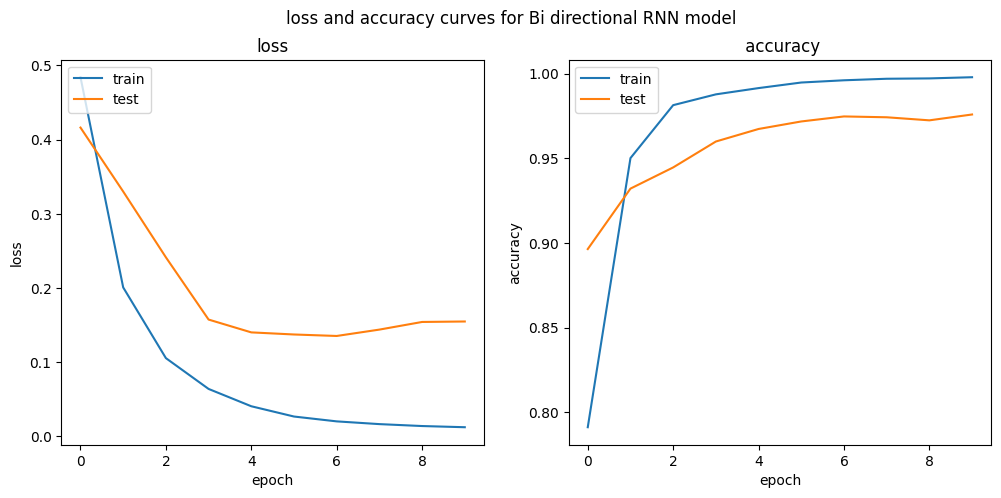

In [ ]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('loss and accuracy curves for Bi directional RNN model')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')


ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title(' accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
fig.show()

### **Model Transformers**

In [ ]:
# Create the model

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self,embeddings_dims,number_heads,linear_layer_dim):
        super(TransformerBlock,self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=number_heads,
                                                            key_dim=embeddings_dims,

        )
        self.layer_normalizing_1  = tf.keras.layers.LayerNormalization()
        self.ffn_1 = tf.keras.layers.Dense(units= linear_layer_dim, activation=tf.nn.relu)
        self.ffn_out = tf.keras.layers.Dense(units=embeddings_dims)
        self.layer_normalizing_2  = tf.keras.layers.LayerNormalization()

    def call(self,inputs):

        att = self.attention(inputs,inputs)
        out1 = self.layer_normalizing_1(inputs + att)

        ffn= self.ffn_1(out1)
        ffn = self.ffn_out(ffn)
        out2 = self.layer_normalizing_2(out1+ffn)

        return out2



class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


class TransformerModel(tf.keras.Model):
    def __init__(self,embed_dim,maxlen,vocab_size):
        super(TransformerModel,self).__init__()
        self.embedding = TokenAndPositionEmbedding(maxlen,vocab_size=vocab_size,embed_dim=embed_dim)

        self.transformer_block_1 = TransformerBlock(embeddings_dims=embed_dim,
                                                    number_heads=4,
                                                    linear_layer_dim=32)
        self.transformer_block_2 = TransformerBlock(embeddings_dims=embed_dim,
                                                    number_heads=8,
                                                    linear_layer_dim=64)

        self.D1 = tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu)
        self.D1_dropout = tf.keras.layers.Dropout(rate=0.3)
        self.out = tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)


    def call(self,x):

        x= self.embedding(x)
        x = self.transformer_block_1(x)
        x = self.transformer_block_2(x )
        x =tf.keras.layers.GlobalAvgPool1D()(x)
        x = self.D1(x)
        x = self.D1_dropout(x)
        x = self.out(x)

        return x


transformer_model = TransformerModel(embed_dim=embeddings_dims,
                         maxlen=max_sequence,
                         vocab_size=vocab_size+1)


# Display the model summary

transformer_model.build(input_shape=(None,max_sequence))
transformer_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'transformer_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "transformer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding         │ ?                           │     0 (unbuilt) │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_1                  │ ?                           │     0 (unbuilt) │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### **Evaluate the model  Transformers**

In [ ]:
# Evaluate the model

transformer_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

EPOCHS = 50
checkpoint_filepath = 'transformer.weights.h5'

checkpointer = ModelCheckpoint(checkpoint_filepath, verbose=1, save_best_only=True, save_weights_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = transformer_model.fit(train_dataset, validation_data=test_dataset, epochs=EPOCHS,
                                callbacks=[checkpointer, early_stopping])

print('*' * 50)
transformer_model.load_weights(checkpoint_filepath)
result.loc[len(result.index)] = ['Transformer', transformer_model.evaluate(test_dataset, verbose=2)[1]]

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6735 - loss: 0.5821
Epoch 1: val_loss improved from inf to 0.51952, saving model to transformer.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.6757 - loss: 0.5811 - val_accuracy: 0.7658 - val_loss: 0.5195
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7728 - loss: 0.4998
Epoch 2: val_loss improved from 0.51952 to 0.36078, saving model to transformer.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.7742 - loss: 0.4970 - val_accuracy: 0.8645 - val_loss: 0.3608
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9295 - loss: 0.1913
Epoch 3: val_loss improved from 0.36078 to 0.17465, saving model to transformer.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.9302 - loss: 0.1895 - val_accuracy: 0.9466 - val_loss: 0.1747
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9815 - loss: 0.0696
Epoch 4: val_loss improved from 0.17465 to 0.13269, 

<Figure size 1000x600 with 0 Axes>

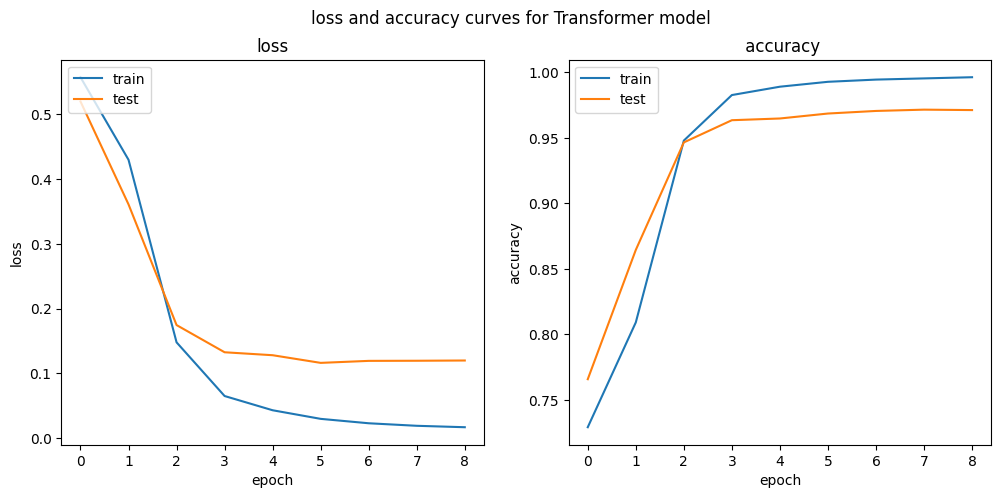

In [ ]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('loss and accuracy curves for Transformer model')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')


ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title(' accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
fig.show()

### **Machine learning algorithms**
Convert text data into numerical format suitable for machine learning algorithms. This typically involves text vectorization techniques like TF-IDF or word embeddings. **bold text**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Ensure all elements in train_text are strings
train_text = [str(text) for text in train_text]
test_text = [str(text) for text in test_text]
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on training data
X_train = tfidf_vectorizer.fit_transform(train_text)
X_test = tfidf_vectorizer.transform(test_text)

### **Model SVM**

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear' ,  C=0.1)

# Train SVM classifier
svm_classifier.fit(X_train, train_target)
# Predictions
svm_predictions = svm_classifier.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(test_target, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
result.loc[len(result.index)] = ['SVM', svm_accuracy]


SVM Accuracy: 0.8618648248643315


### **Model Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train Decision Tree classifier
dt_classifier.fit(X_train, train_target)
# Predictions
dt_predictions = dt_classifier.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(test_target, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
result.loc[len(result.index)] = ['Decision Tree', dt_accuracy]

Decision Tree Accuracy: 0.9590527873704983


### **Model Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=4)

# Train Random Forest classifier
rf_classifier.fit(X_train, train_target)

rf_predictions = rf_classifier.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(test_target, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
result.loc[len(result.index)] = ['Random Forest', rf_accuracy]

Random Forest Accuracy: 0.9531327084361125


### **Model KNN algorithms**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train KNN classifier
knn_classifier.fit(X_train, train_target)

knn_predictions = knn_classifier.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(test_target, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
result.loc[len(result.index)] = ['KNN', knn_accuracy]

KNN Accuracy: 0.8176286794935044


### **Best Model Evaluation**

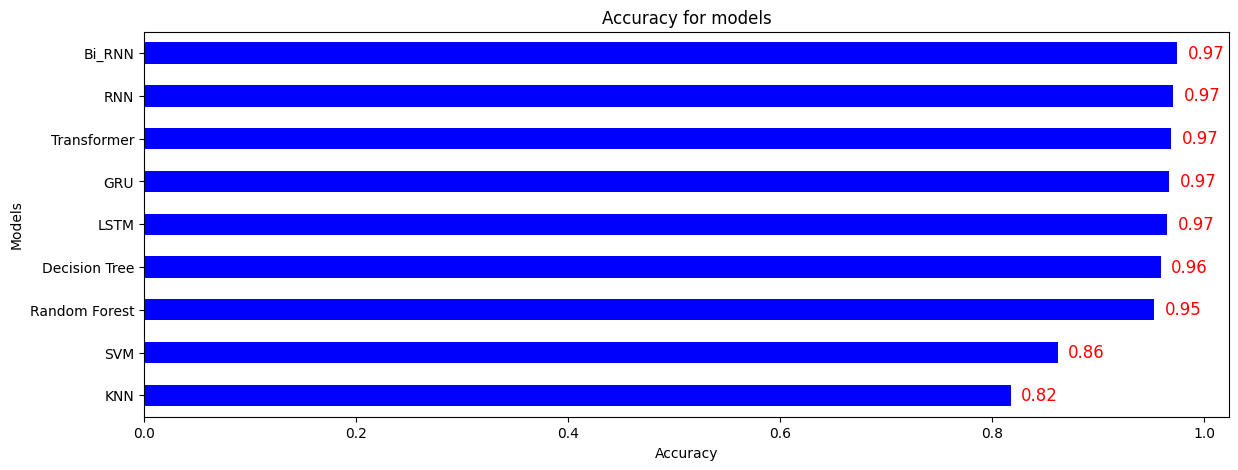

In [ ]:
import matplotlib.pyplot as plt

# افترض أن لديك DataFrame اسمه result يحتوي على الأعمدة 'Models' و'Accuracy'
models_idx = result.set_index('Models')

plt.figure(figsize=(14, 5))
ax = models_idx['Accuracy'].sort_values().plot(kind='barh', color='b', align='center')

# إضافة القيم لكل شريط
for i in ax.patches:
    ax.text(i.get_width() + 0.01, i.get_y() + i.get_height() / 2,
            f'{i.get_width():.2f}', fontsize=12, color='red', va='center')

plt.title('Accuracy for models')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()

### **so Bidirectional RNN model is the best model**

In [ ]:
# @title
# Load the best model
model = model_Bi_rnn
y_true=np.array([])
y_pred=np.array([])
for i in range(5):
    x, y = next(iter(test_dataset))
    y_pred = np.append(y_pred, np.round(model.predict(x)).astype(int))
    y_true = np.append(y_true , (y))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
# @title
# Create a list of the classes

classes=[ 'Bullying' , 'Normal']

### **ConfusionMatrixDisplay**

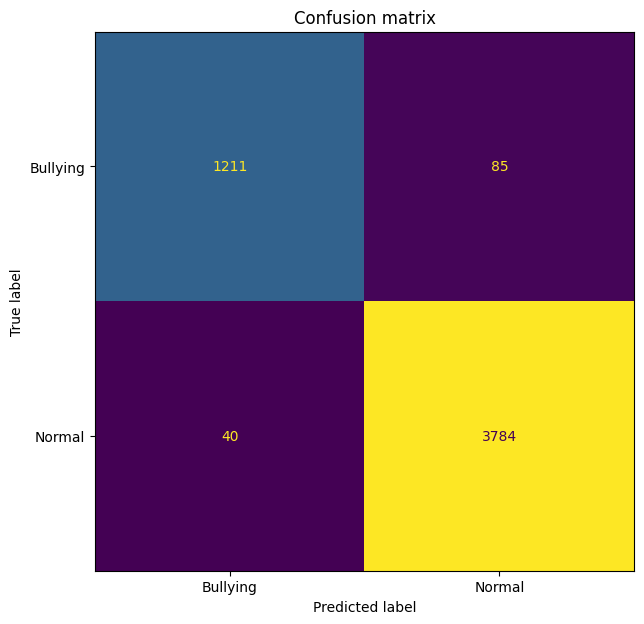

In [ ]:
# @title
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model)
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

plot_confusion_matrix(y_pred, y_true, classes)

In [ ]:
report_nb = classification_report(y_true, y_pred ,target_names=classes)
print("Classification report of best model:\n", report_nb)

Classification report of best model:
               precision    recall  f1-score   support

    Bullying       0.95      0.94      0.94      1268
      Normal       0.98      0.98      0.98      3852

    accuracy                           0.97      5120
   macro avg       0.96      0.96      0.96      5120
weighted avg       0.97      0.97      0.97      5120



### **function that predicts the emoji that represent the entered text**

In [ ]:
# function that predicts the emoji that represent the entered text

def predict(input_text):
    input_text=clean_arabic_text(input_text)
    input_text_tokenized=tokenizer.texts_to_sequences([input_text])
    # print(input_text_tokenized)
    input_padded = tf.keras.preprocessing.sequence.pad_sequences(
    input_text_tokenized,  # The sequences that will be padded/clipped
    maxlen=max_sequence,  # The maximum length of the sequence using max_sequence that's defined earlier
    padding="post",  # Where we'll add zeros if sequence length is shorter that the maximum length, this will add zeros to the end of the sentence
    )
  #  print(input_padded.shape)
    pred=model.predict(input_padded)[0][0]
    pred=round(pred)
    out=classes[pred]
    return out

In [ ]:
# @title  { run: "auto", vertical-output: true, display-mode: "form" }
input_text = "احسنت  ياصديقي" #@param {type:"string"}

predict(input_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'Normal'

### **Gradio interface**

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import gradio as gr

In [ ]:
with gr.Blocks() as demo :
    gr.Markdown(
        """
        # Detecting Arabic Cyberbullying in social media Using NLP
        """
    )

    with gr.Row():
        inp =gr.Text(placeholder='type here' ,interactive=True , label='Input Text' , show_label=True )
        out1 = gr.Text(placeholder=' output' ,interactive=True , label='output Text' , show_label=True )

    # with gr.Row():
    #     out2= gr.Textbox()

    inp.change(fn=predict , inputs=inp , outputs= out1, show_progress='hidden')
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0c0729f241161ede2d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
